# **Naive Bayes Classifier**

```Iris``` dataset description [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris) \
```GaussianNB``` documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris # Iris dataset

In [ ]:
iris = load_iris() # Load the iris dataset
iris_x = iris.data[:,0:2]
iris_y = iris.target

print(iris_x.shape, iris_y.shape)

(150, 2) (150,)


In [ ]:
# Instance kNN object
naive_bayes = GaussianNB()

# Training
naive_bayes.fit( iris_x , iris_y )


GaussianNB()

<ipython-input-4-ae1bbbb61a34>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  axes.scatter(iris_x[:,0],iris_x[:,1],c=iris_y, edgecolors='k', cmap=plt.cm.get_cmap('Paired'))


Text(0, 0.5, 'Petal Width')

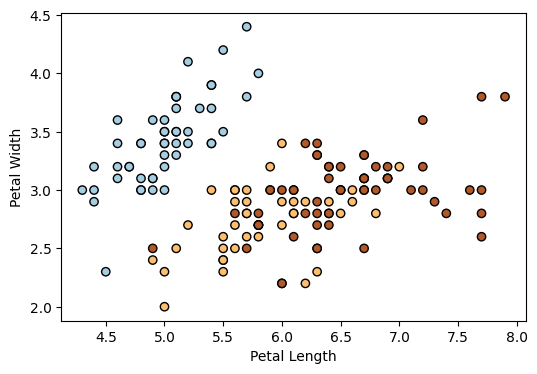

In [ ]:
_, axes = plt.subplots( figsize=(6, 4))
axes.scatter(iris_x[:,0],iris_x[:,1],c=iris_y, edgecolors='k', cmap=plt.cm.get_cmap('Paired'))
axes.set_xlabel('Petal Length')
axes.set_ylabel('Petal Width')

In [ ]:
## Plot decision boundaries
offset = 0.5
x_min, x_max = iris_x[:, 0].min() - offset, iris_x[:, 0].max() + offset
y_min, y_max = iris_x[:, 1].min() - offset, iris_x[:, 1].max() + offset

# Create grid
x_grid, y_grid = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Estimate predictions over the grid
grid_points = np.c_[x_grid.ravel(), y_grid.ravel()]
predictions = naive_bayes.predict(grid_points)
print(predictions.shape)

(10000,)


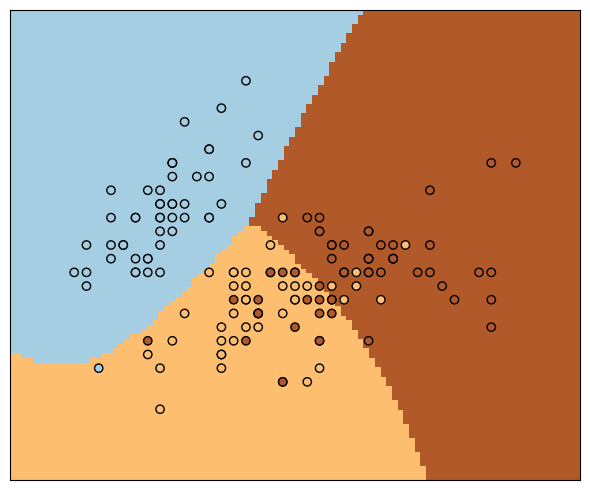

In [ ]:
predictions = predictions.reshape(x_grid.shape)

# Draw grid
_, ax = plt.subplots(figsize=(6, 5))
ax.pcolormesh(x_grid, y_grid, predictions, cmap="Paired", shading='auto')

# Scatter real values
ax.scatter(iris_x[:, 0], iris_x[:, 1], c=iris_y, edgecolors='k', cmap="Paired")

ax.set_xticks([])
ax.set_yticks([])
plt.tight_layout()


## On real data - Fruits dataset

Download the fruits data [here](https://drive.google.com/file/d/1M8tiAWDZclABJN1Meq9oEHCLJTNyHdpP/view?usp=share_link)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

fruit_data = pd.read_csv('/content/drive/MyDrive/ML/machine_learning/Data_Sets/fruits_data_ext.csv')

fruits_x = fruit_data.iloc[:, 0:2].values
fruits_y = fruit_data.iloc[:, 2].values

# Imprime las dimensiones de los arrays
print(fruits_x.shape, fruits_y.shape)

# Muestra las primeras filas del DataFrame
print(fruit_data.head())


(177, 2) (177,)
   Unnamed: 0  fruit_label fruit_name fruit_subtype   mass  width  height  \
0           0            1      apple  granny_smith  192.0    8.4     7.3   
1           1            1      apple  granny_smith  180.0    8.0     6.8   
2           2            1      apple  granny_smith  176.0    7.4     7.2   
3           3            2   mandarin      mandarin   86.0    6.2     4.7   
4           4            2   mandarin      mandarin   84.0    6.0     4.6   

   color_score  
0         0.55  
1         0.59  
2         0.60  
3         0.80  
4         0.79  


In [ ]:
# Instance GaussianNB object
naive_bayes = GaussianNB()

# Training
naive_bayes.fit( fruits_x , fruits_y )


GaussianNB()

In [ ]:
## Plot decision boundaries
offset = 0.5
x_min, x_max = fruits_x[:, 0].min() - offset, fruits_x[:, 0].max() + offset
y_min, y_max = fruits_x[:, 1].min() - offset, fruits_x[:, 1].max() + offset

# Create grid
x_grid, y_grid = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))


# Estimate predictions over the grid
grid_points = np.c_[x_grid.ravel(), y_grid.ravel()]  # Convertir la cuadrícula a un formato adecuado
predictions = naive_bayes.predict(grid_points)
print(predictions.shape)

(10000,)


In [ ]:
predictions = predictions.astype(float)
predictions = predictions.reshape(x_grid.shape)

# Draw grid
_, ax = plt.subplots(figsize=(8, 5))
ax.pcolormesh(x_grid, y_grid, predictions, cmap="Paired", shading='auto')

# Scatter real values
ax.scatter(fruits_x[:, 0], fruits_x[:, 1], c=fruits_y, edgecolors='k', cmap="Paired")

ax.set_xticks([])
ax.set_yticks([])

ValueError: could not convert string to float: 'apple'